# Cleaning US Census Data

I just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had my job before me left all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

This is not scalable or repeatable.

My boss wants me to make some scatterplots and histograms by the end of the day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Inspect the Data!

1. Can I use the data for plots or math? 
2. If not what needs to be cleaned?
 
Lets look at a few csv files and see what is in them.

In [2]:
df = pd.read_csv('states0.csv')
print(df)

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   
5           5    Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
5     NaN  $64,657.80     2648667M_2630239F  


In [3]:
df1 = pd.read_csv('states1.csv')
print(df1)

   Unnamed: 0                 State  TotalPop Hispanic   White   Black Native  \
0           0              Colorado   5278906   20.78%  69.90%   3.55%  0.57%   
1           1           Connecticut   3593222   15.60%  67.68%  10.35%  0.13%   
2           2              Delaware    926454    8.82%  64.63%  20.74%  0.26%   
3           3  District of Columbia    647484    9.17%  33.10%  51.78%  0.20%   
4           4               Florida  19645772   21.34%  59.08%  15.17%  0.21%   
5           5               Georgia  10006693    8.42%  54.29%  32.09%  0.19%   

   Asian Pacific       Income           GenderPop  
0  2.66%     NaN  $64,657.80    2648667M_2630239F  
1  4.02%   0.02%  $76,146.56    1751607M_1841615F  
2  3.27%     NaN  $61,827.98      448413M_478041F  
3  3.38%   0.03%  $75,466.36      306674M_340810F  
4  2.28%   0.05%  $50,690.19   9600009M_10045763F  
5  3.10%   0.05%  $50,811.08    4883331M_5123362F  


# Things That Need Cleaning

-seperate male and female in ['GenderPop']  
-remove $ from ['Income']  
-replace NaN values with 0 or mean.  
-remove % from all elthic columns  
-remove the unnamed column  
-remove duplicates

1. First sets get these files combined into a one dataframe.  
2. we can use .glob() to use regex to look at and grab specific files.

In [4]:
df3 = pd.concat([pd.read_csv(file) for file in glob.glob('states?.csv')], ignore_index=True)
print(df3)

    Unnamed: 0                 State  TotalPop Hispanic   White   Black  \
0            0               Alabama   4830620    3.75%  61.88%  31.25%   
1            1                Alaska    733375    5.91%  60.91%   2.85%   
2            2               Arizona   6641928   29.57%  57.12%   3.85%   
3            3              Arkansas   2958208    6.22%  71.14%  18.97%   
4            4            California  38421464   37.29%  40.22%   5.68%   
5            5              Colorado   5278906   20.78%  69.90%   3.55%   
6            0              Colorado   5278906   20.78%  69.90%   3.55%   
7            1           Connecticut   3593222   15.60%  67.68%  10.35%   
8            2              Delaware    926454    8.82%  64.63%  20.74%   
9            3  District of Columbia    647484    9.17%  33.10%  51.78%   
10           4               Florida  19645772   21.34%  59.08%  15.17%   
11           5               Georgia  10006693    8.42%  54.29%  32.09%   
12           0           

# Clean the Dataframe

We need to do the things we listed above so we can actually use the data to compare make conclutions on what we might be seeing.

In [5]:
df3 = pd.concat([pd.read_csv(file) for file in glob.glob('states?.csv')], ignore_index=True)
# Remove the useless index column unnamed
df3 = df3.drop(columns=['Unnamed: 0'])

# Remove duplicate rows
df3 = df3.drop_duplicates(subset=['State'])

# Remove the % of all ethic columns
df3['Hispanic'] = df3['Hispanic'].replace('%', ' ' , regex=True)
df3['White'] = df3['White'].replace('%', ' ' , regex=True)
df3['Black'] = df3['Black'].replace('%', ' ' , regex=True)
df3['Native'] = df3['Native'].replace('%', ' ' , regex=True)
df3['Asian'] = df3['Asian'].replace('%', ' ' , regex=True)
df3['Pacific'] = df3['Pacific'].replace('%', ' ' , regex=True)
df3['Pacific'] = df3['Pacific'].fillna('0')

# split the GenderPop column into male and female columns
gender_split = df3['GenderPop'].str.split('_')

df3['Female'] = gender_split.str.get(1)
df3['Male'] = gender_split.str.get(0)

#Remove GenderPop column
df3 = df3.drop(columns=['GenderPop'])

# Remove the F and M from the Female and Male columns
df3['Female'] = df3['Female'].replace('F', " ", regex=True)
df3['Male'] = df3['Male'].replace("M", " ", regex=True)

# Add the correct amount of females in columns with NaN values
female_count_maryland = 5930538 - 2872643
female_count_montana = 1014699 - 510163

df3.loc[23, 'Female'] = female_count_maryland
df3.loc[31, 'Female'] = female_count_montana


# Remove the $ and , of ['Income']
df3['Income'] = df3['Income'].replace(',', "", regex=True)
df3['Income'] = df3['Income'].str.replace('$', "", regex=True)

print(df3.head(5))

        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75   61.88   31.25    0.45    1.05    0.03    
1      Alaska    733375    5.91   60.91    2.85   16.39    5.45    1.06    
2     Arizona   6641928   29.57   57.12    3.85    4.36    2.88    0.17    
3    Arkansas   2958208    6.22   71.14   18.97    0.52    1.14    0.15    
4  California  38421464   37.29   40.22    5.68    0.41   13.05    0.35    

      Income     Female       Male  
0  43296.36    2489527    2341093   
1  70354.74     349215     384160   
2  54207.82    3342840    3299088   
3  41935.63    1506295    1451913   
4  67264.78   19334329   19087135   


Now that it is cleaned we need to look at the dtypes and see if we need to change them. If the dtypes are 'object' instead of 'int' or 'float' then we wont be able to plot them. 

In [6]:
print(df3.dtypes)
df3['Hispanic'] = pd.to_numeric(df3['Hispanic'])
df3['White'] = pd.to_numeric(df3['White'])
df3['Black'] = pd.to_numeric(df3['Black'])
df3['Asian'] = pd.to_numeric(df3['Asian'])
df3['Pacific'] = pd.to_numeric(df3['Pacific'])
df3['Native'] = pd.to_numeric(df3['Native'])
df3['Female'] = pd.to_numeric(df3['Female'])
df3['Male'] = pd.to_numeric(df3['Male'])
df3['Income'] = pd.to_numeric(df3['Income'])


print('')
print('After dtype conversion.')        
print(df3.dtypes)

State       object
TotalPop     int64
Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
Income      object
Female      object
Male        object
dtype: object

After dtype conversion.
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Female        int64
Male          int64
dtype: object


Now that the data is cleaned we can use scatter plot and see some comparisons. 

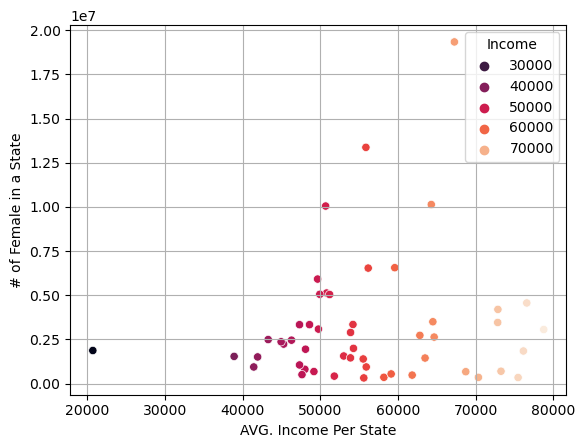

<Figure size 640x480 with 0 Axes>

In [7]:
sns.scatterplot(data=df3, x='Income', y='Female', hue='Income', palette='rocket')
plt.xlabel('AVG. Income Per State')
plt.ylabel('# of Female in a State')
plt.grid()
plt.show()
plt.clf()


## Histogram of Races

Lets look at the different races and see what their avg. income is in each state.

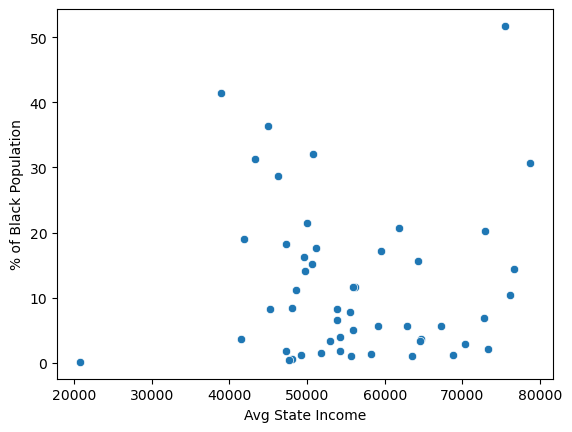

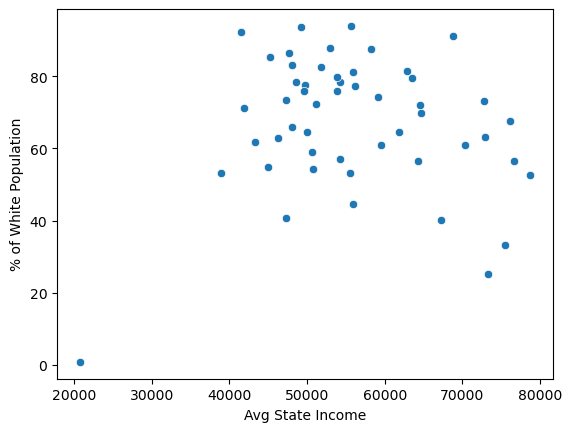

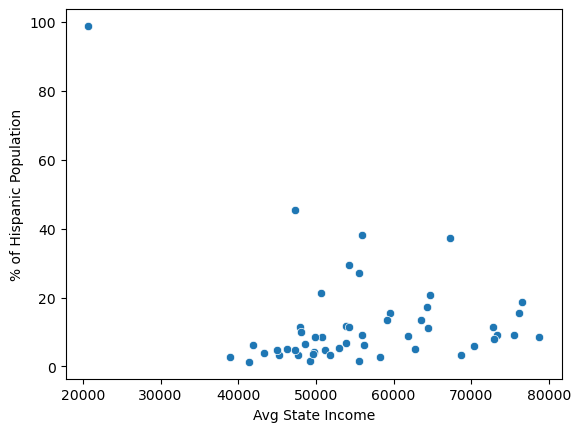

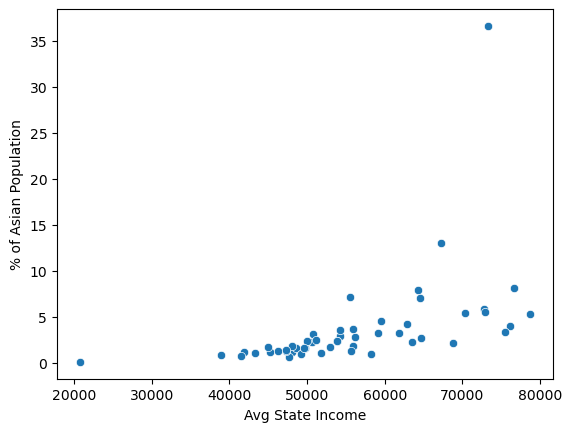

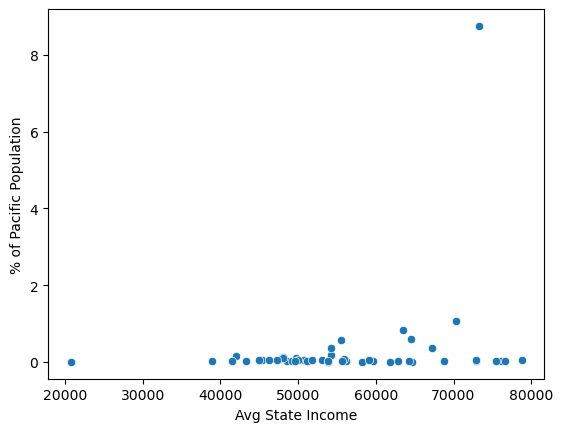

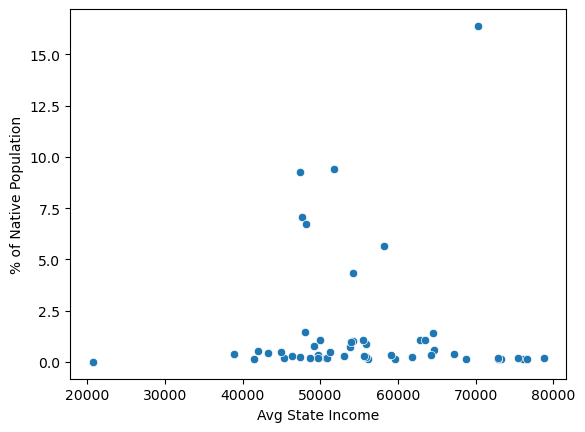

<Figure size 640x480 with 0 Axes>

In [8]:
race_columns = df3[['Black', 'White', 'Hispanic', 'Asian', 'Pacific', 'Native']]
for i in race_columns:
    sns.scatterplot(data=df3, x='Income', y=i,)
    plt.ylabel('% of ' + i + ' Population')
    plt.xlabel('Avg State Income')
    plt.show()
    plt.clf()

How many males are their vs how many females are their in each state?

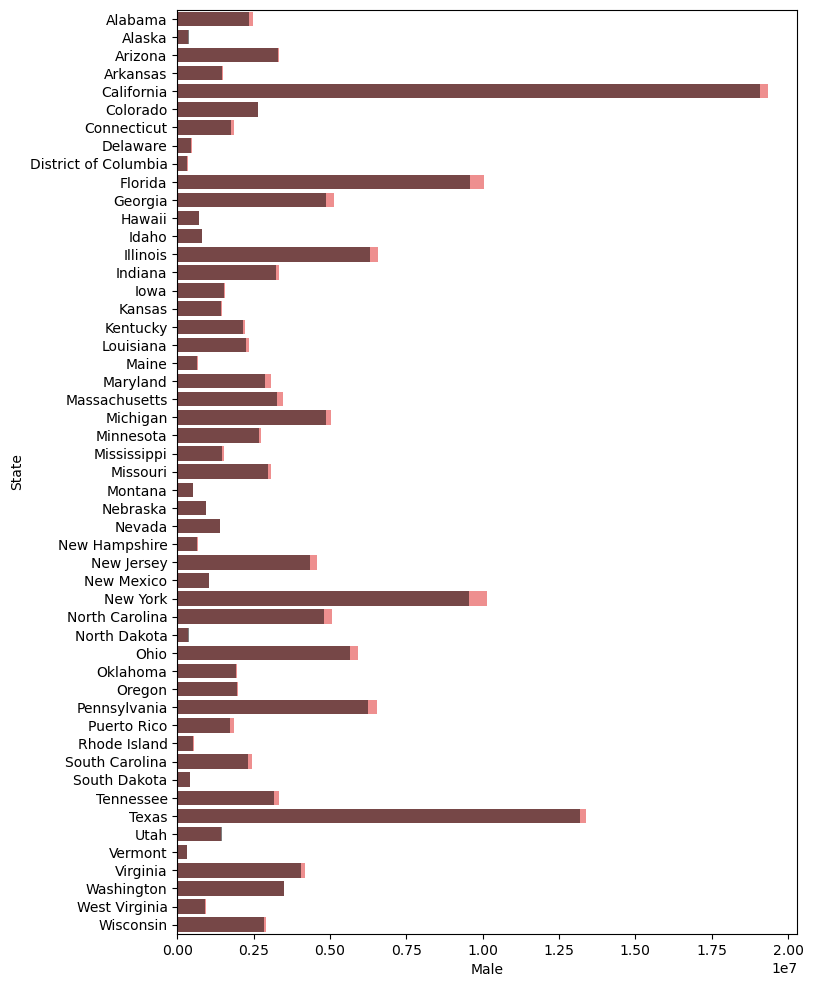

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(8,12))
sns.barplot(data=df3, y='State', x='Female', alpha=.5, color='red')
sns.barplot(data=df3, y='State', x='Male', alpha=.5, color='black')
plt.show()
plt.clf()

How many states have more females than males?

In [10]:
more_females= []
for n, i in df3.iterrows():
    if i['Female'] > i['Male']:
        more_females.append(i['State'])
        
print(str(len(more_females)) + ' of ' + str(len(df3['State'])) + ' States have more females than males.')

42 of 51 States have more females than males.
